# 第1章 统计学习方法概论

1．统计学习是关于计算机基于数据构建概率统计模型并运用模型对数据进行分析与预测的一门学科。统计学习包括监督学习、非监督学习、半监督学习和强化学习。

2．统计学习方法三要素——模型(概率模型和决策函数模型)、策略、算法，对理解统计学习方法起到提纲挈领的作用。

3．本书主要讨论监督学习，监督学习可以概括如下：从给定有限的训练数据出发， 假设数据是独立同分布的，而且假设模型属于某个**假设空间**(hypothesis space， 由输入空间到输出空间的映射的集合)，应用某一评价准则，从假设空间中选取一个最优的模型，使它对已给训练数据及未知测试数据在给定评价标准意义下有最准确的预测。

4．统计学习中，进行模型选择或者说提高学习的泛化能力是一个重要问题。如果只考虑减少训练误差，就可能产生过拟合现象。模型选择的方法有正则化与交叉验证。学习方法泛化能力的分析是统计学习理论研究的重要课题。

5．分类问题(输出变量为有限个离散变量)、标注问题(输入和输出变量都为变量序列)和回归问题(输入和输出都为连续变量)都是监督学习的重要问题。本书中介绍的统计学习方法包括感知机、$k$近邻法、朴素贝叶斯法、决策树、逻辑斯谛回归与最大熵模型、支持向量机、提升方法、EM算法、隐马尔可夫模型和条件随机场。这些方法是主要的分类、标注以及回归方法。它们又可以归类为生成方法与判别方法。

## 损失函数和风险函数
用损失函数(loss function)或代价函数(cost function)来度量预测错误的程度.损失函数是$f(X)和Y$的非负实数,记作$L(Y, f(X))$, 几种常用的损失函数:
- 0-1 损失函数(0-1 loss function)$$L(Y, f(X)) = \begin{cases}1, & \quad Y \ne f(X) \\ 
0, & \quad Y = f(X) 
\end{cases}$$
- 平方损失函数(quadratic loss function)
$$L(Y, f(X))=(Y-f(X))^2$$
- 绝对值损失函数(absolute loss function)
$$L(Y, f(x)) = |Y-f(x)|$$
- 对数损失函数(logarithmic loss function)或对数似然损失(log-likehood loss function)
$$L(Y, P(Y|X)) = -logP(Y|X)$$

损失函数越小, 模型越好. 损失函数的期望:
$$R_{exp}(f) = E_p[L(Y, f(X))]=\int_{\mathcal{X} \times \mathcal{Y}}L(y, f(x))P(x, y)dxdy$$
这是理论条件下模型f(X)关于联合分布P(X, Y)的平均意义下的损失, 称为**风险函数**(rish function)或**期望损失**(expected loss).  

给定训练集$$T = \{(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N)\}$$
模型$f(X)$关于训练数据集的平均损失称为**经验风险**(empirical risk)或**经验损失**(empirical loss):
$$R_{emp}(f) = \frac 1 N \sum_{i=1}^{N}L(y_i, f(x_i))$$

## 经验风险最小化与结构风险最小化的策略

监督学习中, 经验风险最小化(empirical risk minimization, ERM)的策略的优化问题:
$$\mathop{min}_{f \in \mathcal{F}} \frac 1 N \sum_{i=1}^{N}L(y_i, f(x_i))$$
当样本容量足够大是, 经验风险最小化能保证很好的学习效果, 但当样本容量很小时, 容易出现**过拟合***(over-fitting)现象.  

结构风险最小化(structural risk minimization, SRM)用来防止过拟合, 等价于**正则化**(regularization). 结构风险在经验风险上加上表示模型复杂度的正则化项(regularizer)或罚项(penalty term):
$$R_{srm}(f) = \frac 1 N \sum_{i=1}^{N}L(y_i, f(x_i)) + \lambda J(f), \quad \lambda \geq 0$$
$J(f)$为模型的复杂度, 模型f越复杂, 复杂度就越大.结构风险最小化的最优化问题:
$$\mathop{min}_{f \in \mathcal{F}} \frac 1 N \sum_{i=1}^{N}L(y_i, f(x_i)) + \lambda J(f)$$

## 训练误差(training error)和测试误差(test error)
假设学习得到的模型是$Y = \hat f(x)$, 训练误差是模型关于训练数据集的平均损失:
$$R_{emp}(\hat f) = \frac 1 N \sum_{i=1}^{N}L(y_i, \hat f(x_i))$$
其中N为训练样本的容量.  
测试误差是模型关于测试数据集的平均损失:
$$e_{test} = \frac 1 N' \sum_{i=1}^{N'}L(y_i, \hat f(x_i))$$
其中N'是测试样本的容量.

### 使用最小二乘法拟和曲线

高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n = \sum_{i=0}^{n}w_ix^i$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

##  过拟合
过拟合: 所选模型的复杂度比真模型的复杂度更高

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合【例1.1 11页】

确定模型的复杂度(多项式的次数)->经验风险最小化原则求解参数(多项式系数)

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq  # 最小二乘法
import matplotlib.pyplot as plt
np.random.seed(12345)
# plt.rc('figure', figsize=(12, 10))
%matplotlib inline

* ps: numpy.poly1d([1,2,3])  生成一维多项式  $1x^2+2x^1+3x^0$*

In [2]:
f = np.poly1d([1, 2, 3])  # 高次项 -> 低次项 系数
print(f)

   2
1 x + 2 x + 3


In [3]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [4]:
leastsq?
# Parameters
# ----------
# func : callable
#     should take at least one (possibly length N vector) argument and
#     returns M floating point numbers. It must not return NaNs or
#     fitting might fail.
# x0 : ndarray
#     The starting estimate for the minimization.
# args : tuple, optional
#     Any extra arguments to func are placed in this tuple.
# ret = argmin sum(func(p, *args)**2, axis=0)
#         p
# Returns
# -------
# 第一个返回值是 合适的p

In [5]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]


def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')  # 实际函数
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')  # M次多项式拟合曲线
    plt.plot(x, y, 'bo', label='noise')  # 加上噪声的实际点
    plt.legend()
    return p_lsq

### M=0

Fitting Parameters: [0.04948365]


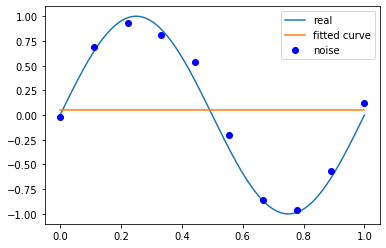

In [6]:
# M=0
p_lsq_0 = fitting(M=0)

### M=1

Fitting Parameters: [-1.23710546  0.66803637]


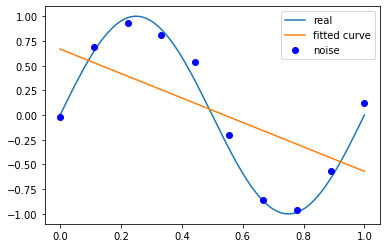

In [7]:
# M=1
p_lsq_1 = fitting(M=1)

### M=3 

Fitting Parameters: [ 21.29751517 -32.0402908   10.97809097  -0.08210263]


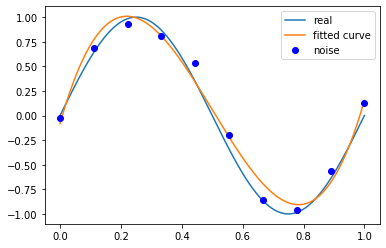

In [8]:
# M=3
p_lsq_3 = fitting(M=3)

### M=9

Fitting Parameters: [-1.05961591e+04  5.02204521e+04 -1.00013601e+05  1.08422506e+05
 -6.92669622e+04  2.63795487e+04 -5.75340426e+03  6.27324960e+02
 -1.95594808e+01 -2.04707659e-02]


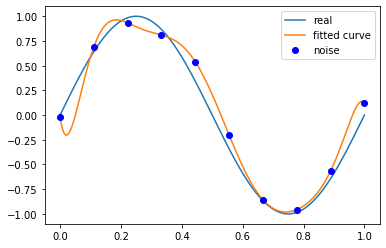

In [9]:
# M=9
p_lsq_9 = fitting(M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

## 模型选择的方法

### 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [10]:
regularization = 0.0001  # 调整系数 𝜆


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y  # 残差
    # (残差, 结构风险)
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [17]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))
p_lsq_regularization[0]

array([-8.39610007e+00, -7.03772456e-01,  5.20115722e+00,  8.06930384e+00,
        6.78611621e+00,  1.17453367e+00, -6.88631674e+00, -1.24845971e+01,
        7.37166717e+00, -2.73363294e-03])

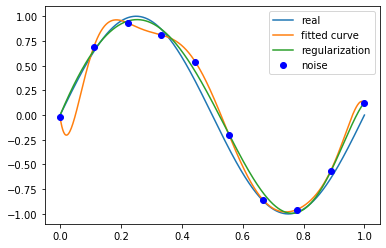

In [18]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

## 泛化能力
学习方法的泛化能力(generalization ability)是指该方法学习到的模型对未知数据的预测能力. 从理论上对学习方法的泛化能力进行分析.
模型$\hat f $ 对未知数据预测的误差即为**泛化误差**(generalization error), 即所学习到的模型的期望风险:
$$R_{exp}(\hat f) = E_P[L(Y, \hat f(X))] = \int_{\mathcal{X} \times \mathcal{Y}}L(y, \hat f(x))P(x, y)dxdy$$
### 泛化误差上界
泛化能力的分析往往是通过研究泛化误差的概率上界进行的, 简称泛化误差上界(generalization error bound).  
通常具有以下性质: 
- 它是样本容量的函数, 当样本容量增加时, 泛化上界趋于0; 
- 它是假设空间容量(capacity)的函数, 假设空间容量越大, 模型就越难学, 泛化误差上界就越大. 


## 生成模型和判别模型
监督学习的任务: 学习一个模型, 应用这一模型, 对给定的输入预测相应地输出.
模型的形式:
- 决策函数: $Y = f(X)$
- 条件概率分布: $P(Y|X)$

学习方法:
- 生成方法(generative approach): $P(Y|X) = \frac {P(X, Y)}{P(X)}$, 由联合概率分布$P(X, Y)$, 求出条件概率分布$P(Y|X)$作为预测的模型即生成模型(generative model) ,例如朴素贝叶斯和隐马尔科夫模型;
- 判别方法(discriminative approach)由数据直接学习决策函数$f(x)$或者条件概率分布$P(Y|X)$作为预测的模型, 即判别模型(discriminative model)例如kNN, 感知机, 决策树, logistic回归模型等


# 习题
## 1.2 通过经验风险最小化推导极大似然估计. 证明模型是条件概率分布P(Y|X), 当损失函数是对数损失函数时, 经验风险最小化等价于极大似然估计
设训练数据集为$T = \{(x_1, y_1), (x_2, y2), \cdots, (x_N, y_N)\}$, 且样本独立同分布  
令$\theta \in \mathbb{R}^N$为模型参数  

模型为条件概率分布
$$\begin{align} P(Y|X;\theta) &= P(y_1,y_2,\cdots,y_N|x_1,x_2,\cdots,x_N;\theta) \\ 
&=\frac {P(y_1,y2,\cdots,y_N, x_1,x_2,\cdots,x_N;\theta)}{P(x_1,x_2,\cdots,x_N;\theta)} \\
&= \frac {\prod_{i=1}^NP(y_i, x_i;\theta)}{\prod_{i=1}^NP(x_i;\theta)} = \prod_{i=1}^NP(y_i|x_i;\theta)
\end{align}$$,  
损失函数为: $$L(Y, P(Y|X)) = -logP(Y|X)$$
经验损失最小化$$\mathop{min}_{f \in \mathcal{F}} \frac 1 N \sum_{i=1}^{N}L(y_i, f(x_i))$$

$$\begin{align}\hat\theta &= \mathop{argmin}_{\theta} -\frac 1 N \sum_{i=1}^{N}logP(y_i|x_i;\theta) \\ 
&= \mathop{argmax}_{\theta}log\prod_{i=1}^NP(y_i|x_i;\theta)  = \mathop{argmax}_{\theta} \prod_{i=1}^NP(y_i|x_i;\theta) \end{align}$$
即此时经验风险最小化等价于极大似然估计.